Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Eduardo Gomez Videla"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [8]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]

# return median from list of 3 values
def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1): # if x2 is median
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1): # if x3 is median
        return x3
    else: # else only remaining var (x1) is the median
        return x1

# quicksort by getting the median and dividing list to 2 equal length parts
def qsort(lst):
    indices = [(0, len(lst))]

    while indices: # acts similar to for loop executing as many times as the length of the input
        (frm, to) = indices.pop() 
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values) # find median and make it partition (ensures more efficient algorithm)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] # left side of list (numbers smaller than median)
        upper = [a for a in lst[frm:to] if a > partition] # right side of list (numbers bigger than median)
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

# randomized version of quicksort
def randomized_quicksort():
    lst = [i for i in range(N)] # for i in range N (10000)
    random.shuffle(lst) # shuffles quicksort input
    return qsort(lst) # run & return randomized quicksort

# tests if function runs properfly
def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.11863340000002154


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

It looks like the Cormen et al. version of quicksort actually takes a random number as the pivot (partition), while the code implementation on this jupyter notebook will first shuffle the entire unsorted list before running the normal quicksort function. For this reason I believe that the code implementation is not truly random, as it should in theory still find the median in the randomly shuffled list. The other main difference is the use of recursion in Cormen et al. vs use of a while loop in the code.

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

From the graph below, the time complexity appears to scale linearly (n).

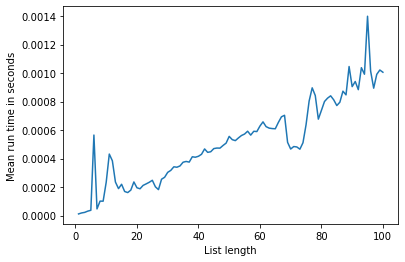

In [29]:
import matplotlib.pyplot as plt 

# YOUR CODE HERE

N = 1
average_list = []
run_times = []

for i in range(1,101):
    
    for i in range(0,120):
        average_list.append(timeit.timeit(randomized_quicksort, number=1))

    run_times.append(sum(average_list) / len(average_list)) # append averaged result
    average_list = [] # reset average list to use in next trial
    N += 1 # increase N by 1

x_axis = []
for i in range(1, 101):
    x_axis.append(i)

# plotting the points  
plt.plot(x_axis, run_times) 
  
# naming the x axis 
plt.xlabel('List length') 
# naming the y axis 
plt.ylabel('Mean run time in seconds')  
  
# function to show the plot 
plt.show() 
    
#raise NotImplementedError()

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. In other word, you may want to put the partition in either ```lower``` or ```upper``` list instead of using ``counts`` and ```lst[ind1:ind2] = [partition] * counts``` as we did in question 1.

In [44]:
# quicksort by getting the median and dividing list to 2 equal length parts
def qsort_NEW(lst):
    indices = [(0, len(lst))]

    while indices: # acts similar to for loop executing as many times as the length of the input
        (frm, to) = indices.pop() 
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values) # find median and make it partition (ensures more efficient algorithm)

        # Split into lists:
        lower = [a for a in lst[frm:to + 1] if a < partition] # left side of list (numbers smaller than median)
        upper = [a for a in lst[frm:to] if a > partition] # right side of list (numbers bigger than median)
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower # by doing this I put the "partition" on the left hand side of the list
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

# randomized version of quicksort
def randomized_quicksort_NEW():
    lst = [i for i in range(N)] # for i in range N (10000)
    random.shuffle(lst) # shuffles quicksort input
    return qsort_NEW(lst) # run & return randomized quicksort


In [45]:
# test

qsort([8,4,6,2,5,7,10,1,3,21,45,87,12])

[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 21, 45, 87]

In [43]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([4,4,2,2,1,1])==[1,1,2,2,4,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

It appears that my attempt at Q4a is not right because the two algorithms have the same running times. I tried to change the algorithm by changing 1 line:

from: lower = [a for a in lst[frm:to] if a < partition]

to:   lower = [a for a in lst[frm:to + 1] if a < partition]

I thought that by adding the +1 the lower (left hand side) of the list would also include the partition.

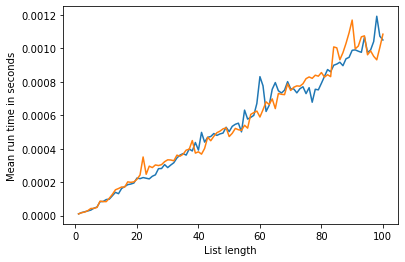

In [47]:
import matplotlib.pyplot as plt 

# YOUR CODE HERE

N = 1
average_list = []
run_times2 = []

for i in range(1,101):
    
    for i in range(0,120):
        average_list.append(timeit.timeit(randomized_quicksort_NEW, number=1))

    run_times2.append(sum(average_list) / len(average_list)) # append averaged result
    average_list = [] # reset average list to use in next trial
    N += 1 # increase N by 1

x_axis2 = []
for i in range(1, 101):
    x_axis2.append(i)

# plotting the original randomized qsort points  
plt.plot(x_axis, run_times)
    
# plotting the new randomized qsort points  
plt.plot(x_axis2, run_times2) 
  
# naming the x axis 
plt.xlabel('List length') 
# naming the y axis 
plt.ylabel('Mean run time in seconds')  
  
# function to show the plot 
plt.show() 
    
#raise NotImplementedError()

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [52]:
# quicksort by getting the median and dividing list to 2 equal length parts
def qsort_first_element(lst):
    indices = [(0, len(lst))]

    while indices: # acts similar to for loop executing as many times as the length of the input
        (frm, to) = indices.pop() 
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = lst[0] # find median and make it partition (ensures more efficient algorithm)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] # left side of list (numbers smaller than median)
        upper = [a for a in lst[frm:to] if a > partition] # right side of list (numbers bigger than median)
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

# randomized version of quicksort
def randomized_quicksort_first_element():
    lst = [i for i in range(N)] # for i in range N (10000)
    random.shuffle(lst) # shuffles quicksort input
    return qsort_first_element(lst) # run & return randomized quicksort

In [53]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
N = 1
average_list = []
run_times2 = []

for i in range(1,11):
    print('first',i)
    
    for i in range(0,30):
        average_list.append(timeit.timeit(randomized_quicksort_first_element, number=1))
        print('second', i)

    run_times2.append(sum(average_list) / len(average_list)) # append averaged result
    average_list = [] # reset average list to use in next trial
    N += 1 # increase N by 1

x_axis2 = []
for i in range(1, 101):
    x_axis2.append(i)
    
# plotting the new randomized qsort points  
plt.plot(x_axis2, run_times2) 
  
# naming the x axis 
plt.xlabel('List length') 
# naming the y axis 
plt.ylabel('Mean run time in seconds')  
  
# function to show the plot 
plt.show() 

first 1
second 0
second 1
second 2
second 3
second 4
second 5
second 6
second 7
second 8
second 9
second 10
second 11
second 12
second 13
second 14
second 15
second 16
second 17
second 18
second 19
second 20
second 21
second 22
second 23
second 24
second 25
second 26
second 27
second 28
second 29
first 2
second 0
second 1


## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


I was not able to answer this question. I am not sure where I would start to make this estimation.